# Introduction to Keras

* high-level neural networks API, written in Python and capable of running on top of [TensorFlow](https://github.com/tensorflow/tensorflow), [CNTK](https://github.com/Microsoft/cntk), or [Theano](https://github.com/Theano/Theano)
* Allows easy and fast prototyping
* Runs seamlessly on CPU and GPU
* open source
* Documentation: [https://keras.io/](https://keras.io/)

## installation
First install the backend, for exmaple [TensorFlow](https://www.tensorflow.org/install/).

`$ pip install keras`

## MNIST classification task

The MNIST data set is a database of handwritten digits that is commonly used for training various image processing systems. The goal if this task is to implement a classifier of handwritten digits using neural networks.

![Mnist data set](images/mnist-examples.png)

## Load the data

The data is already shuffled and split to train and test parts.

In [1]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train original shape: {}".format(X_train.shape))
print("y_train original shape: {}".format(y_train.shape))
print("X_test original shape: {}".format(X_test.shape))
print("y_test original shape: {}".format(y_test.shape))

Using TensorFlow backend.


X_train original shape: (60000, 28, 28)
y_train original shape: (60000,)
X_test original shape: (10000, 28, 28)
y_test original shape: (10000,)


Look at one random example

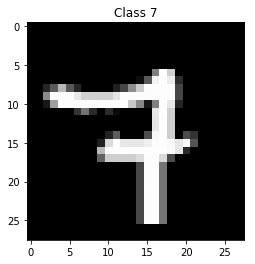

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
i=3498

#print(X_train[i])
plt.imshow(X_train[i], cmap='gray')
plt.title("Class {}".format(y_train[i]))
plt.show()

## Transform the data

We need to scale the input values to have the range (0,1).

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Our neural-network is going to take a single vector for each training example, so we need to reshape the input so that each 28x28 image becomes a single 784 dimensional vector.

In [4]:
X_train_flat = X_train.reshape(60000, 784)
X_test_flat = X_test.reshape(10000, 784)
print("X_train matrix shape: {}".format(X_train_flat.shape))
print("X_test matrix shape: {}".format(X_test_flat.shape))

X_train matrix shape: (60000, 784)
X_test matrix shape: (10000, 784)


Transform the targets into one-hot encoding, i.e.
```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
```
etc.

In [5]:
from keras.utils import np_utils

n_classes = 10

print(y_train[49])

y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)

print(y_train[49])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Architecture of one-layer classifier for MNIST

![Mnist data set](images/one-layer-nn.png)

## Architecture definition

Create a sequential model

In [6]:
from keras.models import Sequential

model = Sequential()

Define its structure.

In [7]:
from keras.layers import Dense, Activation

model.add(Dense(64, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

Compile the model

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the model

In [9]:
model.fit(X_train_flat, y_train,
          batch_size = 128, epochs = 5, verbose=1,
          validation_data=(X_test_flat, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.4239 - acc: 0.8854 - val_loss: 0.2248 - val_acc: 0.9360
Epoch 2/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.1994 - acc: 0.9436 - val_loss: 0.1727 - val_acc: 0.9486
Epoch 3/5
60000/60000 [==============================] - 2s 36us/step - loss: 0.1548 - acc: 0.9553 - val_loss: 0.1473 - val_acc: 0.9590
Epoch 4/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.1267 - acc: 0.9636 - val_loss: 0.1252 - val_acc: 0.9634
Epoch 5/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.1068 - acc: 0.9693 - val_loss: 0.1178 - val_acc: 0.9651


## Evaluate the model

First we need to convert probability vectors to class indices.

In [10]:
y_pred = model.predict(X_test_flat)

print(y_pred.shape)

(10000, 10)


In [11]:
import numpy as np

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class.shape)

(10000,)


We can use the scikit-learn functions now.

In [12]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


print ("Test accuracy: {:.4f}".format(accuracy_score(y_test_class, y_pred_class)))
print ()
print(metrics.classification_report(y_test_class, y_pred_class, digits=4))

Test accuracy: 0.9651

             precision    recall  f1-score   support

          0     0.9690    0.9888    0.9788       980
          1     0.9850    0.9850    0.9850      1135
          2     0.9428    0.9738    0.9581      1032
          3     0.9575    0.9594    0.9585      1010
          4     0.9598    0.9735    0.9666       982
          5     0.9837    0.9451    0.9640       892
          6     0.9639    0.9749    0.9694       958
          7     0.9748    0.9426    0.9585      1028
          8     0.9418    0.9641    0.9528       974
          9     0.9743    0.9405    0.9571      1009

avg / total     0.9654    0.9651    0.9651     10000



In [13]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test_class, y_pred_class))

[[ 969    0    1    1    0    3    3    2    1    0]
 [   0 1118    4    0    0    0    5    0    8    0]
 [   5    0 1005    2    3    0    3    6    8    0]
 [   1    0   13  969    1    2    0    9   15    0]
 [   1    0    5    1  956    0    7    1    2    9]
 [   4    1    0   14    2  843   10    1   13    4]
 [   8    3    3    1    4    3  934    0    2    0]
 [   1    7   28    7    4    0    0  969    1   11]
 [   4    0    6    6    6    3    7    2  939    1]
 [   7    6    1   11   20    3    0    4    8  949]]


In [14]:
y_pred = model.predict(X_train_flat)
y_pred_class = np.argmax(y_pred, axis=1)
y_train_class = np.argmax(y_train, axis=1)

print ("Train accuracy: {:.4f}".format(accuracy_score(y_train_class, y_pred_class)))
print ()
print(metrics.classification_report(y_train_class, y_pred_class, digits=4))

Train accuracy: 0.9737

             precision    recall  f1-score   support

          0     0.9845    0.9870    0.9858      5923
          1     0.9825    0.9840    0.9833      6742
          2     0.9576    0.9846    0.9709      5958
          3     0.9722    0.9566    0.9643      6131
          4     0.9643    0.9796    0.9719      5842
          5     0.9860    0.9594    0.9725      5421
          6     0.9731    0.9912    0.9821      5918
          7     0.9871    0.9657    0.9763      6265
          8     0.9536    0.9728    0.9631      5851
          9     0.9761    0.9541    0.9650      5949

avg / total     0.9738    0.9737    0.9736     60000



# Convolutional neural network for MNIST classification

## Reshape the input data

In [15]:
X_train3d = X_train.reshape(60000, 28, 28, 1)
X_test3d = X_test.reshape(10000, 28, 28, 1)

## Architecture definition

Create a sequential model and define its structure.

In [16]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(16, kernel_size=(5, 5), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(32))
model.add(Flatten())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

Compile the model

In [17]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the model

In [18]:
model.fit(X_train3d, y_train,
          batch_size = 128, epochs = 5, verbose=1,
          validation_data=(X_test3d, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 32s 535us/step - loss: 0.3339 - acc: 0.9045 - val_loss: 0.0965 - val_acc: 0.9716
Epoch 2/5
60000/60000 [==============================] - 24s 399us/step - loss: 0.1095 - acc: 0.9665 - val_loss: 0.0657 - val_acc: 0.9798
Epoch 3/5
60000/60000 [==============================] - 19s 324us/step - loss: 0.0829 - acc: 0.9748 - val_loss: 0.0548 - val_acc: 0.9822
Epoch 4/5
60000/60000 [==============================] - 20s 328us/step - loss: 0.0725 - acc: 0.9769 - val_loss: 0.0523 - val_acc: 0.9832
Epoch 5/5
60000/60000 [==============================] - 19s 319us/step - loss: 0.0645 - acc: 0.9803 - val_loss: 0.0438 - val_acc: 0.9855


## Evaluate the model

In [19]:
y_pred = model.predict(X_test3d)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [20]:
print ("Test accuracy: {:.4f}".format(accuracy_score(y_test_class, y_pred_class)))
print ()
print(metrics.classification_report(y_test_class, y_pred_class, digits=4))

Test accuracy: 0.9855

             precision    recall  f1-score   support

          0     0.9750    0.9969    0.9859       980
          1     0.9895    0.9930    0.9912      1135
          2     0.9761    0.9913    0.9837      1032
          3     0.9882    0.9921    0.9901      1010
          4     0.9908    0.9847    0.9877       982
          5     0.9888    0.9888    0.9888       892
          6     0.9947    0.9781    0.9863       958
          7     0.9862    0.9747    0.9804      1028
          8     0.9865    0.9754    0.9809       974
          9     0.9802    0.9792    0.9797      1009

avg / total     0.9856    0.9855    0.9855     10000



In [21]:
print(confusion_matrix(y_test_class, y_pred_class))

[[ 977    0    0    0    0    1    0    1    1    0]
 [   0 1127    4    0    1    1    1    0    1    0]
 [   1    2 1023    2    1    0    1    2    0    0]
 [   0    0    2 1002    0    1    0    3    2    0]
 [   2    1    1    0  967    0    1    1    2    7]
 [   2    0    0    6    0  882    2    0    0    0]
 [   8    2    0    0    3    3  937    0    5    0]
 [   1    3   14    2    0    1    0 1002    1    4]
 [   6    0    4    1    1    1    0    2  950    9]
 [   5    4    0    1    3    2    0    5    1  988]]


In [22]:
y_pred = model.predict(X_train3d)
y_pred_class = np.argmax(y_pred, axis=1)
y_train_class = np.argmax(y_train, axis=1)

print ("Train accuracy: {:.4f}".format(accuracy_score(y_train_class, y_pred_class)))
print ()
print(metrics.classification_report(y_train_class, y_pred_class, digits=4))

Train accuracy: 0.9883

             precision    recall  f1-score   support

          0     0.9896    0.9978    0.9937      5923
          1     0.9930    0.9910    0.9920      6742
          2     0.9804    0.9898    0.9850      5958
          3     0.9902    0.9860    0.9881      6131
          4     0.9936    0.9873    0.9905      5842
          5     0.9896    0.9876    0.9886      5421
          6     0.9958    0.9904    0.9931      5918
          7     0.9856    0.9866    0.9861      6265
          8     0.9844    0.9805    0.9824      5851
          9     0.9803    0.9854    0.9828      5949

avg / total     0.9883    0.9883    0.9883     60000



## Let's look at some incorrectly classified examples

In [23]:
y_pred = model.predict(X_test3d)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

incorrect_indices = np.nonzero(y_pred_class != y_test_class)[0]
print(incorrect_indices)

[ 211  259  321  340  445  582  619  684  717  726  740  844  846  947
 1014 1039 1112 1178 1182 1226 1232 1242 1247 1260 1319 1326 1393 1414
 1522 1527 1530 1581 1709 1717 1754 1878 1901 1903 2035 2043 2053 2093
 2109 2118 2130 2135 2182 2189 2266 2272 2293 2387 2406 2447 2454 2462
 2488 2597 2607 2654 2760 2896 2921 2927 2939 2979 2995 3012 3030 3073
 3289 3384 3422 3503 3520 3558 3597 3727 3751 3767 3808 3853 3906 4007
 4075 4163 4224 4238 4248 4256 4265 4382 4400 4497 4507 4536 4547 4571
 4575 4639 4740 4761 4807 4814 4874 4956 5246 5288 5634 5842 5877 5887
 5888 5937 5955 5973 6505 6571 6576 6597 6625 6651 6755 6783 7094 7121
 7432 7434 8059 8408 8520 9009 9015 9019 9024 9664 9679 9692 9698 9729
 9770 9839 9888 9905 9982]


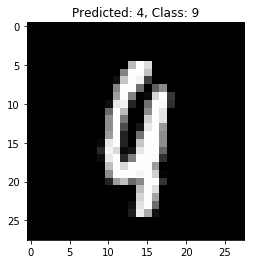

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
i = incorrect_indices[20]

plt.imshow(X_test[i], cmap='gray')
plt.title("Predicted: {}, Class: {}".format(y_pred_class[i], y_test_class[i]))
plt.show()